<a href="https://www.kaggle.com/code/saneryesil/50-startup?scriptVersionId=121967282" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Doğrusal Regresyon 

50 adet Startup'ın araştırma ve geliştirmeye yönelik harcaması, yönetime yönelik harcaması, pazarlama harcaması, kazandıkları kar miktarı ve kuruldukları lokasyon bilgisi bulunmaktadır. Amaç kar miktarını tahmin etmektir. Bu bir sayısal tahmin problemidir ve bağımlı değişkenimiz "Profit".

Numpy, matplotlib.pyplot, pandas ve seaborn kütüphanelerini çekirdeğe dahil edelim.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Dizinde bulunan veri çerçevemizi startups değişkenine atayalım. startups değişkenini df değişkenine kopyalayarak kullanmaya başlayalım.

In [2]:
startups= pd.read_csv("../input/50startups/50_Startups.csv")
df = startups.copy()

İlk 5 gözlemini yazdıralım.

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Veri çerçevesinin bilgilerini görüntüleyelim.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Kaç gözlem ve öznitelikten oluştuğunu görüntüleyelim.

In [5]:
df.shape

(50, 5)

Eksik verileri kontrol edelim.

In [6]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Korelasyon matrisi çizdirelim.

In [7]:
df.corr() #korelasyon sayılar arasındaki ilişkidir. 1'e yaklaştıkça bağ sağlamlığı arttığı anlamına gelir.

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Seaborn ile korelasyon matrisinin ısı haritasını çizdirelim.

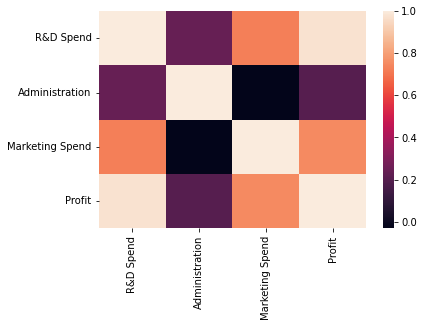

In [8]:
corr = df.corr()
sns.heatmap(corr,
           
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values);

R&D Spend ve Profit arasındaki korelasyonu daha iyi görebilmek için scatterplot çizdirelim.

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

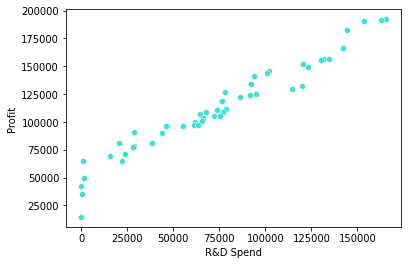

In [9]:
sns.scatterplot(x="R&D Spend" , y="Profit" , data=df , color="turquoise")

Sayısal değişkenlerin dağılımını görmek için df üzerinden histogram çizdirelim.

array([[<AxesSubplot:title={'center':'R&D Spend'}>,
        <AxesSubplot:title={'center':'Administration'}>],
       [<AxesSubplot:title={'center':'Marketing Spend'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

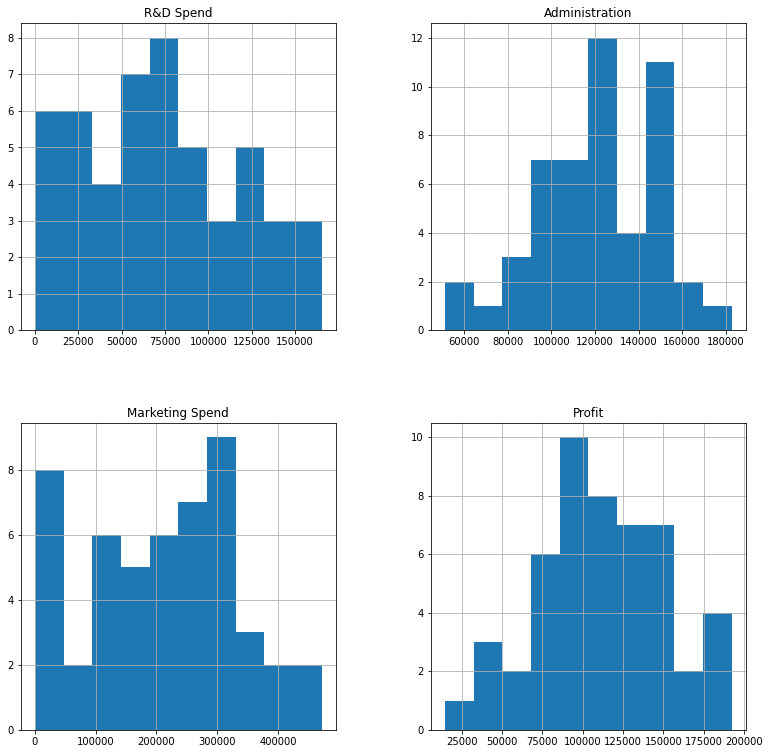

In [10]:
df.hist(figsize=(13,13))

Veri çerçevesinin temel istatistik değerlerini görüntüleyelim.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


State'a ait benzersiz değerleri görüntüleyelim.

In [12]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

get_dummies yardımıyla State'a dair kategorik öznitelik çıkarımlarında bulunalım. Çünkü State'ların birbirine üstünlüğü yok, nominaller. Ordinal değil.

In [13]:
df["State"]=pd.Categorical(df["State"])
df_Dummies=pd.get_dummies(df["State"])
df_Dummies.head(10)

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [14]:
df=pd.concat([df,df_Dummies],axis=1)

In [15]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


State özniteliğini silip dummy olarak yaratılan State'lardan da birisini hariç tutarak veri çerçevemizi güncelleyelim.

In [16]:
df.drop(["State" , "Florida"], axis=1,inplace = True)

In [17]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,Profit,California,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,0,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0
7,130298.13,145530.06,323876.68,155752.60,0,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0


Veri çerçevemizi bağımlı ve bağımsız değişkenler olmak üzere bölütleyelim.

In [18]:
x=df.drop("Profit",axis=1)#bağımsız
y=df["Profit"]#bağımlı

Bağımlı ve bağımsız değişkenleri kontrol edelim.

In [19]:
x.head(10)

,R&D Spend,Administration,Marketing Spend,California,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,0,0
5,131876.90,99814.71,362861.36,0,1
6,134615.46,147198.87,127716.82,1,0
7,130298.13,145530.06,323876.68,0,0
8,120542.52,148718.95,311613.29,0,1
9,123334.88,108679.17,304981.62,1,0


In [20]:
y.head(10)

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
5    156991.12
6    156122.51
7    155752.60
8    152211.77
9    149759.96
Name: Profit, dtype: float64

Bu bağımlı ve bağımsız değişkenlerden train ve test olmak üzere 4 parça oluşturalım. Bunu yapmak için train_test_split kullanalım.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

4 parça değişkeni kontrol edelim.

In [23]:
x_train

,R&D Spend,Administration,Marketing Spend,California,New York
32,63408.86,129219.61,46085.25,1,0
39,38558.51,82982.09,174999.30,1,0
21,78389.47,153773.43,299737.29,0,1
36,28663.76,127056.21,201126.82,0,0
19,86419.70,153514.11,0.00,0,1
42,23640.93,96189.63,148001.11,1,0
49,0.00,116983.80,45173.06,1,0
26,75328.87,144135.98,134050.07,0,0
22,73994.56,122782.75,303319.26,0,0
13,91992.39,135495.07,252664.93,1,0


In [24]:
y_train

32     97427.84
39     81005.76
21    111313.02
36     90708.19
19    122776.86
42     71498.49
49     14681.40
26    105733.54
22    110352.25
13    134307.35
41     77798.83
17    125370.37
45     64926.08
24    108552.04
23    108733.99
4     166187.94
33     96778.92
14    132602.65
30     99937.59
10    146121.95
28    103282.38
44     65200.33
34     96712.80
18    124266.90
20    118474.03
25    107404.34
6     156122.51
7     155752.60
47     42559.73
1     191792.06
16    126992.93
0     192261.83
15    129917.04
5     156991.12
11    144259.40
9     149759.96
8     152211.77
12    141585.52
43     69758.98
37     89949.14
Name: Profit, dtype: float64

In [25]:
x_test

,R&D Spend,Administration,Marketing Spend,California,New York
27,72107.60,127864.55,353183.81,0,1
35,46014.02,85047.44,205517.64,0,1
40,28754.33,118546.05,172795.67,1,0
38,20229.59,65947.93,185265.10,0,1
2,153441.51,101145.55,407934.54,0,0
3,144372.41,118671.85,383199.62,0,1
48,542.05,51743.15,0.00,0,1
29,65605.48,153032.06,107138.38,0,1
46,1315.46,115816.21,297114.46,0,0
31,61136.38,152701.92,88218.23,0,1


In [26]:
y_test

27    105008.31
35     96479.51
40     78239.91
38     81229.06
2     191050.39
3     182901.99
48     35673.41
29    101004.64
46     49490.75
31     97483.56
Name: Profit, dtype: float64

LinearRegression'u çekirdeğe dahil edip modeli inşa edelim.

In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

Modeli eğitmek için bağımlı bağımsız değişkenlerden oluşturulan eğitim verilerini verelim.

In [28]:
model = lr.fit(x_train,y_train)

Modele daha önce görmediği bağımlı test değişkenini tahmin ettirelim. Bu tahmin değerlerimizi y_pred değişkenine atayalım.

In [29]:
y_pred=model.predict(x_test)
y_pred

array([114664.41715865,  90593.15531622,  75692.84151574,  70221.88679653,
       179790.25514874, 171576.92018521,  49753.58752034, 102276.65888935,
        58649.37795758,  98272.0256113 ])

Tahminleri ve gerçek değerleri bir veri çerçevesinde toplayıp üzerinde göz gezdirelim.

In [30]:
df_veri=pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred,
                     'Hata Payı': abs(y_test-y_pred)})
df_veri

,Gerçek Değerler,Tahmin Edilen Değerler,Hata Payı
27,105008.31,114664.417159,9656.107159
35,96479.51,90593.155316,5886.354684
40,78239.91,75692.841516,2547.068484
38,81229.06,70221.886797,11007.173203
2,191050.39,179790.255149,11260.134851
3,182901.99,171576.920185,11325.069815
48,35673.41,49753.587520,14080.177520
29,101004.64,102276.658889,1272.018889
46,49490.75,58649.377958,9158.627958
31,97483.56,98272.025611,788.465611


sklearn bünyesinde barınan metrics'i çekirdeğe dahil edelim ve MAE, MSE, RMSE değerlerini görüntüleyelim.

In [31]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
mae

7698.11981747698

In [32]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

79495441.50401536

In [33]:
import math
rmse=math.sqrt(mse)
rmse

8916.02161863773

Modelin R Squared değerini eğitim verileri üzerinden yazdıralım.

In [34]:
RS=lr.score(x_train,y_train)
RS

0.942446542689397